In [12]:
#import the necessary libraries
import pickle
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os,os.path
import visualkeras
import seaborn as sns

from PIL import ImageFont, Image
from tensorflow.keras import Model
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPool2D, Reshape, BatchNormalization
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.utils import plot_model
import opendatasets as od
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

In [5]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [50]:
train_gen = datagen.flow_from_directory(directory = '/content/railway-track-fault-detection-resized-224-x-224/train',
                                          class_mode="categorical",
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          color_mode='rgb',
                                          seed = 1234,
                                          shuffle = True)

Found 299 images belonging to 2 classes.


In [11]:
#For downloading dataset in google colab
# od.download('https://www.kaggle.com/datasets/gpiosenka/railway-track-fault-detection-resized-224-x-224/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dammalaudaykiran
Your Kaggle Key: ··········


100%|██████████| 12.7M/12.7M [00:00<00:00, 14.7MB/s]


In [48]:
val_gen = datagen.flow_from_directory(directory = '/content/railway-track-fault-detection-resized-224-x-224/valid',
                                          class_mode="categorical",
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          color_mode='rgb',
                                          seed = 1234,
                                          shuffle = True)

Found 62 images belonging to 2 classes.


In [49]:
test_gen = datagen.flow_from_directory(directory = '/content/railway-track-fault-detection-resized-224-x-224/test',
                                          class_mode="categorical",
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          color_mode='rgb',
                                          shuffle = False)

Found 22 images belonging to 2 classes.


In [17]:
def reset_graph(seed=41):
    tf.random.set_seed(seed)
    np.random.seed(seed)

### InceptionV3

In [2]:
InceptionV3_model = InceptionV3(weights='imagenet')



96112376/96112376 [==============================] - 60s 1us/step


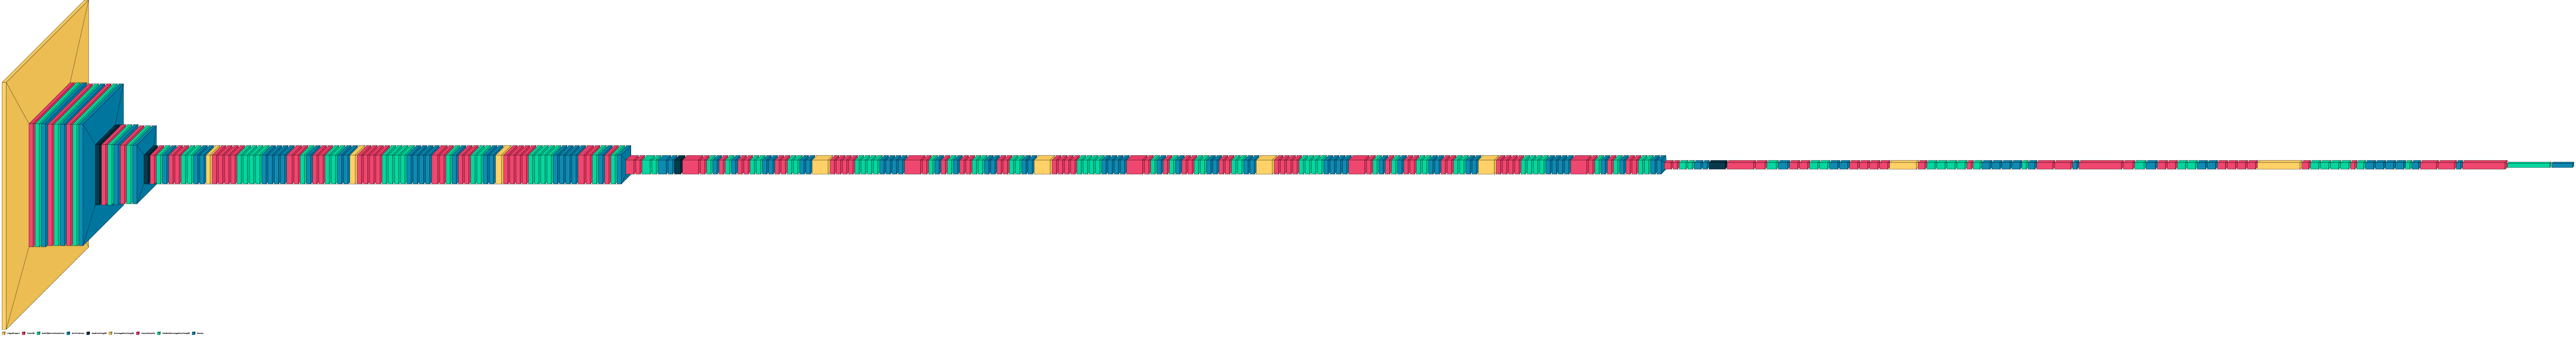

In [3]:
#visual representation of inceptionV3 model
visualkeras.layered_view(InceptionV3_model, legend=True)

In [4]:
InceptionV3_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalizati

 conv2d_11 (Conv2D)          (None, 35, 35, 32)           6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, 35, 35, 64)           192       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, 35, 35, 64)           192       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, 35, 35, 96)           288       ['conv2d_10[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, 35, 35, 96)           0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, 35, 35, 64)           0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, 35, 35, 288)          0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_28 (Conv2D)          (None, 35, 35, 96)           55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, 35, 35, 96)           288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 35, 35, 96)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 17, 17, 384)          995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, 17, 17, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, 17, 17, 192)          172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, 17, 17, 192)          172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, 17, 17, 192)          147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 17, 17, 192)          576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 17, 17, 768)          0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, 17, 17, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, 17, 17, 192)          215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, 17, 17, 192)          215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 17, 17, 160)          0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 17, 17, 160)          0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 17, 17, 768)          0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, 17, 17, 192)          576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 17, 17, 192)          576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 17, 17, 192)          0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 17, 17, 192)          0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, 8, 8, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, 8, 8, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, 8, 8, 320)            960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, 8, 8, 192)            576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 8, 8, 192)            576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

In [5]:
plot_model(InceptionV3_model, to_file= 'InceptionV3_model.png', show_shapes = True, show_layer_names=True)

In [52]:
#make the non-necessary layers untrainable
InceptionV3_model.trainable = False

In [53]:
#dataset is imbalanced so as to balance all classes extra images are added to all classes
augmentation = tf.keras.Sequential([
   tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
   tf.keras.layers.experimental.preprocessing.RandomRotation(0.15),
   tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
   tf.keras.layers.experimental.preprocessing.RandomContrast(0.15),
])

In [54]:
#adding layers which will be trained
inputs = InceptionV3_model.input
x = augmentation(inputs)

x = BatchNormalization()(InceptionV3_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.45, seed=1234)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.45, seed=1235)(x)
x = Flatten()(x)

outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [55]:
reset_graph(seed=10)

#model compilation with categorical crossentropy 
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [32]:
#training the model on google colab tpu for faster training
model_training = model.fit(train_gen, epochs=10, verbose=1, validation_data=val_gen)

Epoch 1/10
10/10 [==============================] - 10s 358ms/step - loss: 0.0598 - accuracy: 0.9766 - val_loss: 0.5443 - val_accuracy: 0.7581
Epoch 2/10
10/10 [==============================] - 2s 166ms/step - loss: 0.0715 - accuracy: 0.9599 - val_loss: 1.3461 - val_accuracy: 0.5968
Epoch 3/10
10/10 [==============================] - 2s 164ms/step - loss: 0.0623 - accuracy: 0.9766 - val_loss: 0.6427 - val_accuracy: 0.7258
Epoch 4/10
10/10 [==============================] - 2s 172ms/step - loss: 0.0557 - accuracy: 0.9799 - val_loss: 0.6250 - val_accuracy: 0.7097
Epoch 5/10
10/10 [==============================] - 2s 165ms/step - loss: 0.0365 - accuracy: 0.9799 - val_loss: 0.8838 - val_accuracy: 0.6935
Epoch 6/10
10/10 [==============================] - 2s 175ms/step - loss: 0.0439 - accuracy: 0.9799 - val_loss: 0.6503 - val_accuracy: 0.7097
Epoch 7/10
10/10 [==============================] - 2s 180ms/step - loss: 0.0285 - accuracy: 0.9933 - val_loss: 0.7772 - val_accuracy: 0.7419
Epoch

In [33]:
#creating a dataframe for accuracies and losses
pd.DataFrame(model_training.history)

,loss,accuracy,val_loss,val_accuracy
0,0.059752,0.976589,0.544311,0.758065
1,0.071512,0.959866,1.346113,0.596774
2,0.062273,0.976589,0.642673,0.725806
3,0.055664,0.979933,0.625000,0.709677
4,0.036533,0.979933,0.883786,0.693548
5,0.043914,0.979933,0.650283,0.709677
6,0.028535,0.993311,0.777179,0.741935
7,0.038877,0.979933,0.709158,0.725806
8,0.038461,0.986622,0.799275,0.725806
9,0.046054,0.989967,0.716076,0.709677


In [34]:
#evaluating results on test set
results = model.evaluate(test_gen, verbose=1)

1/1 [==============================] - 0s 190ms/step - loss: 0.9151 - accuracy: 0.7273


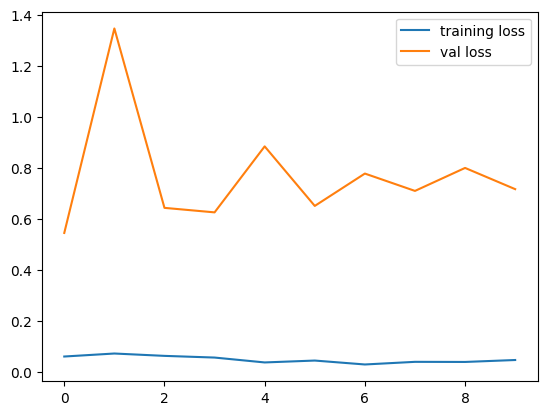

In [37]:
#plotting training vs val loss
plt.plot(model_training.history['loss'], label='training loss')
plt.plot(model_training.history['val_loss'], label='val loss')
plt.legend()

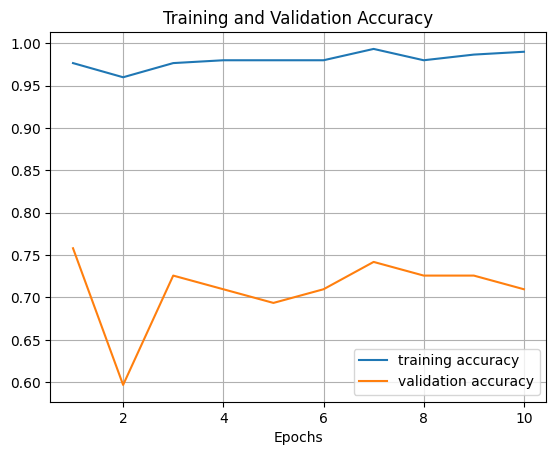

In [38]:
#plotting accuracies for each epoch
Epochs = [i+1 for i in range(len(model_training.history['accuracy']))]

plt.plot(Epochs, model_training.history['accuracy'], label = 'training accuracy')
plt.plot(Epochs, model_training.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.show()

## VGG16

In [39]:
#importing pre trained vgg16 model for keras
from tensorflow.keras.applications.vgg16 import VGG16

In [40]:
model_train = VGG16(input_shape=(224,224,3) , weights='imagenet', include_top=False)

#make the non-necessary layers untrainable
for layer in model_train.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 2s 0us/step


In [43]:
#reshaping and flattening the output
x = Reshape((7*7,512))(model_train.output)
x = Flatten()(x)
x = Dense(128)(x)
x = Dense(64)(x)
prediction = Dense(2, activation='softmax')(x)

# create a model object
model = Model(inputs=model_train.input, outputs=prediction)

In [44]:
#model compilation
model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.001) , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [9]:
#saving the best model for future uses and use of dynamic learning rate
def train_model(model, train_gen, val_gen, epochs,name):
    path_cp = name + 'weights.hdf5'
    rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 4, verbose = 1,
                                min_delta = 1e-4, min_lr = 1e-4, mode = 'min', cooldown=1)
    ckp = ModelCheckpoint(path_cp,monitor = 'val_loss',
                      verbose = 1, save_best_only = True, mode = 'min')
    es = EarlyStopping(monitor = 'val_loss', min_delta = 1e-4, patience = 6,mode = 'min', restore_best_weights = True, verbose = 1)

    # Fitting the model
    history = model.fit(train_generator,
                          epochs = epochs,
                          validation_data = validation_generator,
                          verbose = 1,
                          callbacks = [rlr,es,ckp])

    return history

In [68]:
#model training
train_history = train_model(model, train_gen,val_gen, epochs = 20,name="vgg16")

Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 0.0570 - accuracy: 0.9732
Epoch 1: val_loss improved from inf to 6.05060, saving model to vgg16_vowels_weights.hdf5
10/10 [==============================] - 2s 228ms/step - loss: 0.0570 - accuracy: 0.9732 - val_loss: 6.0506 - val_accuracy: 0.5645 - lr: 1.0000e-04
Epoch 2/20
10/10 [==============================] - ETA: 0s - loss: 0.0588 - accuracy: 0.9699
Epoch 2: val_loss did not improve from 6.05060
10/10 [==============================] - 1s 101ms/step - loss: 0.0588 - accuracy: 0.9699 - val_loss: 6.1385 - val_accuracy: 0.5645 - lr: 1.0000e-04
Epoch 3/20
10/10 [==============================] - ETA: 0s - loss: 0.0550 - accuracy: 0.9766
Epoch 3: val_loss did not improve from 6.05060
10/10 [==============================] - 1s 90ms/step - loss: 0.0550 - accuracy: 0.9766 - val_loss: 6.2230 - val_accuracy: 0.5645 - lr: 1.0000e-04
Epoch 4/20
10/10 [==============================] - ETA: 0s - loss: 0.0667 - accuracy: 0.97

In [69]:
#evalutaing model on test set
model.evaluate(test_gen)

1/1 [==============================] - 3s 3s/step - loss: 3.6873 - accuracy: 0.6364


[3.6872618198394775, 0.6363636255264282]

In [73]:
#opening the saved file
with open('vgg16_history.pkl', 'wb') as file_pi:
    pickle.dump(train_history.history, file_pi)

#loading the history
with open('vgg16_history.pkl', "rb") as file_pi:
    history = pickle.load(file_pi)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


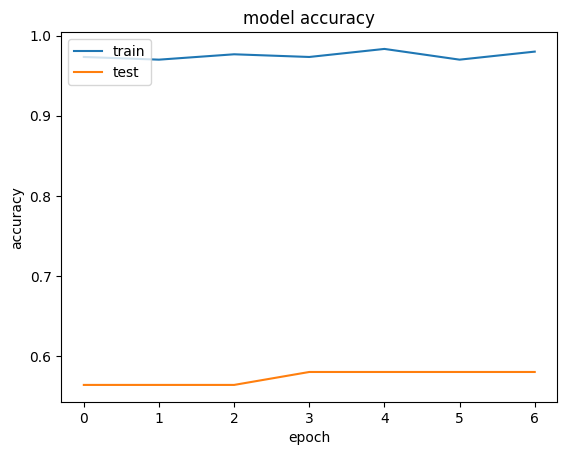

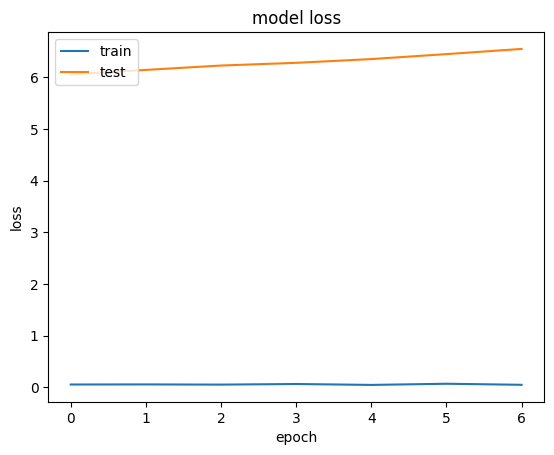

In [74]:
#plotting accuracies and losses
print(history.keys())

# summarize history for accuracy
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [86]:
#Predicted label
#function for calculating model metrics
def metric_visualization(generator):

    y_pred = model.predict(generator)
    y_pred_label = np.argmax(y_pred,axis=1)

    #true labels
    y_test = generator.classes

    class_report =  classification_report(y_test,y_pred_label,target_names=['fault','no fault'],output_dict=True)
    sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,cmap='inferno')

    conf_matrix = confusion_matrix(y_test, y_pred_label)
    plt.figure(figsize=(10,6))
    fx=sns.heatmap(confusion_matrix(y_test,y_pred_label), annot=True, fmt=".2f",cmap="inferno")
    fx.set_title('Confusion Matrix \n')
    fx.set_xlabel('\n Predicted Values\n')
    fx.set_ylabel('Actual Values\n')
    fx.xaxis.set_ticklabels(['fault','no fault'])
    fx.yaxis.set_ticklabels(['fault','no fault'])
    plt.show()

2/2 [==============================] - 0s 138ms/step


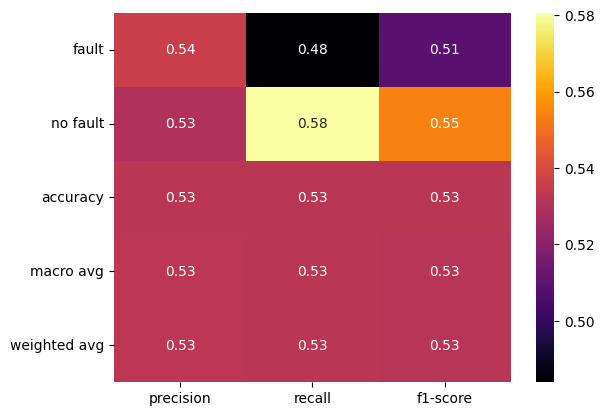

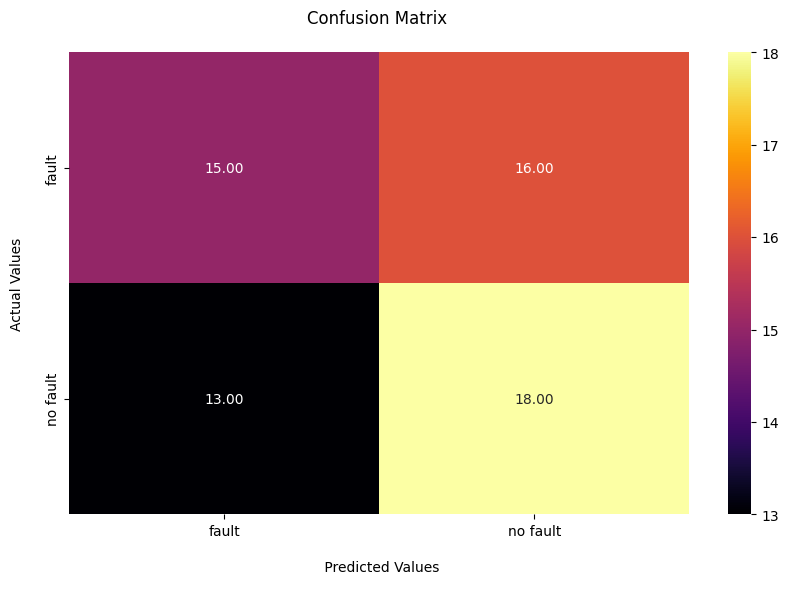

In [87]:
metric_visualization(val_gen)

## MobileNet

In [92]:
#importing mobileNet model from keras
model_mobile =tf.keras.applications.MobileNetV2(
    include_top=False,
    input_shape=(224,224,3),
    weights='imagenet'
)
model_mobile.trainable = False

# adding input and output layers
input_layer = tf.keras.layers.Input(shape=(224,224,3))
x = model_mobile(input_layer,training=False)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024,activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
output = tf.keras.layers.Dense(2,activation='softmax')(x)

model_mobile = tf.keras.Model(inputs=[input_layer],outputs=[output])
model_mobile.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_4 (Flatten)         (None, 62720)             0         
                                                                 
 dense_11 (Dense)            (None, 1024)              64226304  
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                                 
 dense_12 (Dense)            (None, 2)                 2050      
                                                           

In [93]:
#adding earlystopping, dynamic leraning rate and callbacks
earlystop = EarlyStopping(patience=3)
reduce_learning_rate = ReduceLROnPlateau(monitor="val_accuracy",
                                         patience=2, verbose=1,
                                         factor=0.5,  min_lr=0.00001)

callbacks = [earlystop,reduce_learning_rate]
model_mobile.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [94]:
#training model
history_mobile = model_mobile.fit(train_gen,epochs=10,validation_data=val_gen,callbacks=callbacks)

Epoch 1/10
10/10 [==============================] - 7s 381ms/step - loss: 20.3424 - accuracy: 0.6355 - val_loss: 14.6614 - val_accuracy: 0.6290 - lr: 0.0010
Epoch 2/10
10/10 [==============================] - 1s 108ms/step - loss: 5.0411 - accuracy: 0.8294 - val_loss: 6.2230 - val_accuracy: 0.7097 - lr: 0.0010
Epoch 3/10
10/10 [==============================] - 1s 105ms/step - loss: 1.5283 - accuracy: 0.9164 - val_loss: 11.0796 - val_accuracy: 0.5645 - lr: 0.0010
Epoch 4/10
10/10 [==============================] - ETA: 0s - loss: 1.2743 - accuracy: 0.9097
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
10/10 [==============================] - 1s 125ms/step - loss: 1.2743 - accuracy: 0.9097 - val_loss: 9.3689 - val_accuracy: 0.6129 - lr: 0.0010
Epoch 5/10
10/10 [==============================] - 1s 87ms/step - loss: 0.1753 - accuracy: 0.9833 - val_loss: 7.4646 - val_accuracy: 0.6613 - lr: 5.0000e-04


## DenseNet

In [95]:
#importing DenseNet model from keras
model_DenseNet =tf.keras.applications.DenseNet201(
    include_top=False,
    input_shape=(224,224,3),
    weights='imagenet'
)
model_DenseNet.trainable = False

#adding input and output layers
input_layer = tf.keras.layers.Input(shape=(224,224,3))
x = model_DenseNet(input_layer,training=False)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024,activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
output = tf.keras.layers.Dense(2,activation='softmax')(x)

model_DenseNet = tf.keras.Model(inputs=[input_layer],outputs=[output])
model_DenseNet.summary()

74836368/74836368 [==============================] - 3s 0us/step
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 flatten_5 (Flatten)         (None, 94080)             0         
                                                                 
 dense_13 (Dense)            (None, 1024)              96338944  
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_14 (Dense)            (None, 2)                 2050      
                                                            

In [96]:
#model compilation
model_DenseNet.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [98]:
#model training
history_dense = model_DenseNet.fit(train_gen,epochs=10,validation_data=val_gen,callbacks=callbacks)

Epoch 1/10
10/10 [==============================] - 36s 2s/step - loss: 30.1655 - accuracy: 0.5786 - val_loss: 5.7831 - val_accuracy: 0.8065 - lr: 0.0010
Epoch 2/10
10/10 [==============================] - 2s 194ms/step - loss: 10.9542 - accuracy: 0.8094 - val_loss: 7.4936 - val_accuracy: 0.7258 - lr: 0.0010
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 1.7575 - accuracy: 0.9164
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
10/10 [==============================] - 2s 192ms/step - loss: 1.7575 - accuracy: 0.9164 - val_loss: 3.4729 - val_accuracy: 0.8065 - lr: 0.0010
Epoch 4/10
10/10 [==============================] - 2s 194ms/step - loss: 0.9850 - accuracy: 0.9298 - val_loss: 3.0720 - val_accuracy: 0.8548 - lr: 5.0000e-04
Epoch 5/10
10/10 [==============================] - 2s 211ms/step - loss: 0.7650 - accuracy: 0.9565 - val_loss: 2.5934 - val_accuracy: 0.8710 - lr: 5.0000e-04
Epoch 6/10
10/10 [==============================] - 2s 196

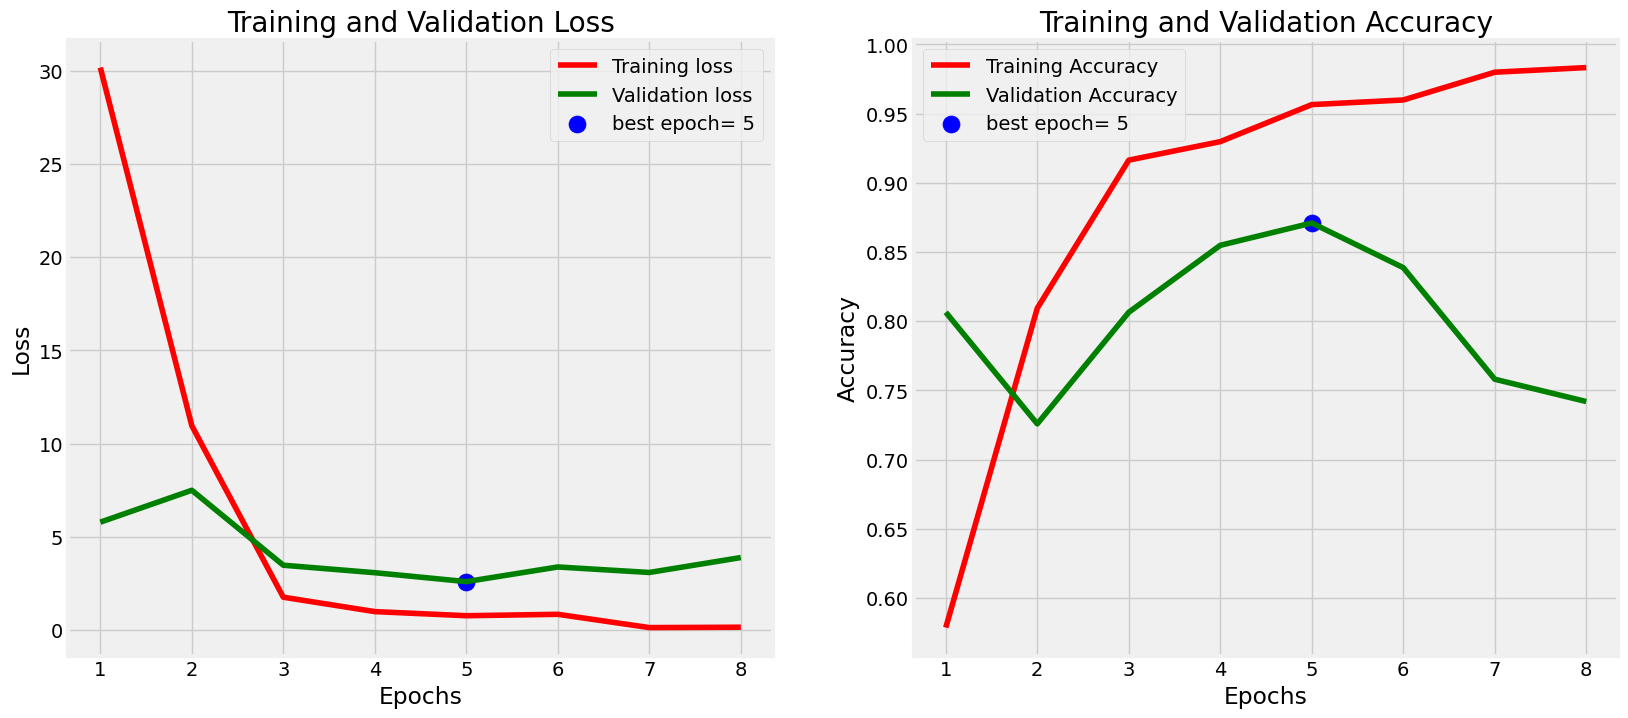

In [99]:
# Run this cell for plots between training and validation accuracy
tr_acc = history_dense.history['accuracy']
tr_loss = history_dense.history['loss']
val_acc = history_dense.history['val_accuracy']
val_loss = history_dense.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

## ResNet

In [100]:
#importing ResNet50 pre trained model from keras
model_ResNet =tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(224,224,3),
    weights='imagenet'
)
model_ResNet.trainable = False

#adding input and output layers
input_layer = tf.keras.layers.Input(shape=(224,224,3))
x = model_ResNet(input_layer,training=False)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024,activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
output = tf.keras.layers.Dense(2,activation='softmax')(x)

model_ResNet = tf.keras.Model(inputs=[input_layer],outputs=[output])
model_ResNet.summary()

94765736/94765736 [==============================] - 3s 0us/step
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_6 (Flatten)         (None, 100352)            0         
                                                                 
 dense_15 (Dense)            (None, 1024)              102761472 
                                                                 
 dropout_7 (Dropout)         (None, 1024)              0         
                                                                 
 dense_16 (Dense)            (None, 2)                 2050      
                                                            

In [101]:
#model compilation
model_ResNet.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [102]:
#model training
history_res = model_ResNet.fit(train_gen,epochs=10,validation_data=val_gen,callbacks=callbacks)

Epoch 1/10
10/10 [==============================] - 13s 651ms/step - loss: 26.4228 - accuracy: 0.5452 - val_loss: 38.8760 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/10
10/10 [==============================] - 2s 149ms/step - loss: 18.5464 - accuracy: 0.4816 - val_loss: 3.6244 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 5.9754 - accuracy: 0.5686
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
10/10 [==============================] - 2s 150ms/step - loss: 5.9754 - accuracy: 0.5686 - val_loss: 8.6401 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/10
10/10 [==============================] - 2s 153ms/step - loss: 4.3717 - accuracy: 0.6722 - val_loss: 1.6121 - val_accuracy: 0.5000 - lr: 5.0000e-04
Epoch 5/10
10/10 [==============================] - 2s 156ms/step - loss: 4.0773 - accuracy: 0.5886 - val_loss: 1.7545 - val_accuracy: 0.5806 - lr: 5.0000e-04
Epoch 6/10
10/10 [==============================] - 2s

In [ ]:
# Run this cell for plots between training and validation accuracy
tr_acc = history_res.history['accuracy']
tr_loss = history_res.history['loss']
val_acc = history_res.history['val_accuracy']
val_loss = history_res.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()